In [27]:
!pip install faker mimesis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 17.5 MB/s eta 0:00:00


In [28]:
import pandas as pd
import numpy as np

In [29]:
product_data_df=pd.read_csv("products.csv")

In [30]:
product_data_df.head()

,product_id,category,product_name,price,image,color_hex,color
0,0633d9fd9a3271730fae687f105c7a3a,Juices,B Natural Dakshin Pink Guava (750 ml),95,https://rukminim1.flixcart.com/image/832/832/j...,#b37972,Rose Gold
1,8687c5317c6629f89fe62e0233563246,Chocolates & Sweets,Parle Melody Chocolaty Toffee (195.5 g),50,https://rukminim1.flixcart.com/image/832/832/j...,#0a090b,Vampire Black
2,cf7eeba428641c14e43aa18ada1b5491,Household Care|Pet Food,Whiskas Adult (+1 year) Fish 3 kg Dry Cat Food,680,https://rukminim1.flixcart.com/image/832/832/j...,#9c288b,Violet (Crayola)
3,9eb4d8359a3cbe7af6c5ac1c3149940e,"Creams, Lotions, Skin Care",Enchanteur Romantic Perfumed Body Lotion (250...,182,https://rukminim1.flixcart.com/image/832/832/k...,#f1eef2,Anti-Flash White
4,b84c9f6fc53da0c6921147063d894703,Hair Care,Pantene Hair Fall Control Shampoo (180 ml),112,https://rukminim1.flixcart.com/image/832/832/j...,#000000,Black


In [31]:
categories,colors=list(set(product_data_df["category"])),list(set(product_data_df["color"]))
print(f"Distinct values of categories and colors: {len(categories)}, {len(colors)}")

Distinct values of categories and colors: 43, 168


In [32]:
product_data_df.sample()["product_id"].values[0]

'048924e40e81ba972747055423379d50'

In [34]:
from faker import Faker
import random
import pandas as pd
import numpy as np
from mimesis import Generic

fake = Faker()
generic = Generic()

# Generate user profiles
def generate_user_profile():
    return {
        'user_id': fake.uuid4(),
        'user_name':generic.person.full_name(),
        'age': generic.person.age(minimum=18,maximum=66),
        'gender': random.choice(["Male","Female"]),
        'favorite_colors': random.sample(colors, random.randint(1, len(colors))),
        'favorite_categories': random.sample(categories, random.randint(1, len(categories)))
    }

# Generate user interactions (clicks, purchases, ratings)
def generate_user_interaction(user_id, product_id):
    action = random.choice(['click', 'purchase', 'rate'])
    if action == 'click':
        weight = 0.5
    elif action == 'purchase':
        weight = 1.0
    else:
        weight = 1.5

    return {
        'user_id': user_id,
        'product_id': product_id,
        'action': action,
        'weight': weight
    }

# Generate synthetic data
num_users = 1000
num_products = len(product_data_df)
num_interactions = int(0.25*(num_users*num_products))

users = [generate_user_profile() for _ in range(num_users)]
interactions = [generate_user_interaction(random.choice(users)['user_id'], product_data_df.sample()["product_id"].values[0]) for _ in range(num_interactions)]

# Convert data to pandas DataFrames
users_df = pd.DataFrame(users)
products_df = product_data_df
interactions_df = pd.DataFrame(interactions)

# Save data to CSV files
users_df.to_csv('users.csv', index=False)
interactions_df.to_csv('interactions.csv', index=False)

In [35]:
interactions_df.head()

,user_id,product_id,action,weight
0,44c7469b-9b36-4f0b-ba8b-545499584c7c,71098cd1a688063867c78626c2bc8a8e,purchase,1.0
1,f232a34e-1abc-48f2-8b7f-1e6812f3c8ea,1262d509d0782b69be247598d4b51703,rate,1.5
2,334b003f-c24a-4df6-ba4a-f6dd73a6ab82,24c77f1032e7bbf8b5655931ec5d13f4,rate,1.5
3,d3bd2605-c5fb-4c18-a383-2a634391cf09,b9ef32bb9a0b46ab6a1180241078670b,rate,1.5
4,3ba506fc-a177-4099-ade4-798371202c1b,4038d26edb5445165edbe1e6369ae110,click,0.5


In [36]:
users_df.head()

,user_id,user_name,age,gender,favorite_colors,favorite_categories
0,7b2b016d-72ac-4a82-8d89-879a586d594e,Merissa Potter,34,Male,"[Orange-Yellow, Alabaster, Meat Brown, Brown Y...","[Masalas & Spices, Atta & Flours, Jams & Honey..."
1,1d33be28-ac08-4eb5-bd42-e9cebbcf3026,Sam Shaffer,47,Female,"[Persian Indigo, Carrot Orange, Royal Brown, D...","[Detergents & Laundry, Creams, Lotions, Skin C..."
2,d1cf18db-1504-48ed-9d3a-546bcd3b00fa,Velvet Nicholson,46,Male,"[Dust Storm, Marigold, Isabelline, St. Patrick...","[Ready To Cook, Sanitary Needs, Kajal & Makeup..."
3,c05f450c-f916-47fe-8dd2-65efe84b43cb,Mozell Warner,35,Female,"[Tart Orange, Old Moss Green, Metallic Brown, ...","[Diapers & Wipes, Chips,Namkeen & Snacks, Read..."
4,075bdbe3-0f5d-46cb-80d3-656ce87689a7,Josefine Vega,46,Female,"[Charleston Green, Dark Chocolate (Hershey's),...","[Ketchups & Spreads, Hair Care, Ghee & Oils, C..."


In [37]:
products_df.head()

,product_id,category,product_name,price,image,color_hex,color
0,0633d9fd9a3271730fae687f105c7a3a,Juices,B Natural Dakshin Pink Guava (750 ml),95,https://rukminim1.flixcart.com/image/832/832/j...,#b37972,Rose Gold
1,8687c5317c6629f89fe62e0233563246,Chocolates & Sweets,Parle Melody Chocolaty Toffee (195.5 g),50,https://rukminim1.flixcart.com/image/832/832/j...,#0a090b,Vampire Black
2,cf7eeba428641c14e43aa18ada1b5491,Household Care|Pet Food,Whiskas Adult (+1 year) Fish 3 kg Dry Cat Food,680,https://rukminim1.flixcart.com/image/832/832/j...,#9c288b,Violet (Crayola)
3,9eb4d8359a3cbe7af6c5ac1c3149940e,"Creams, Lotions, Skin Care",Enchanteur Romantic Perfumed Body Lotion (250...,182,https://rukminim1.flixcart.com/image/832/832/k...,#f1eef2,Anti-Flash White
4,b84c9f6fc53da0c6921147063d894703,Hair Care,Pantene Hair Fall Control Shampoo (180 ml),112,https://rukminim1.flixcart.com/image/832/832/j...,#000000,Black


In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Data Cleaning: Handling Missing Values (if needed)
users_df.fillna(value={'age': users_df['age'].median()}, inplace=True)

# Feature Engineering: Encode Categorical Features and Normalize Numerical Features
label_encoder = LabelEncoder()
scaler = MinMaxScaler()

users_df['gender_encoded'] = label_encoder.fit_transform(users_df['gender'])

users_df['age_scaled'] = scaler.fit_transform(users_df[['age']])

products_df['price_scaled'] = scaler.fit_transform(products_df[['price']])

Visualizing the imported products data and generated interactions data

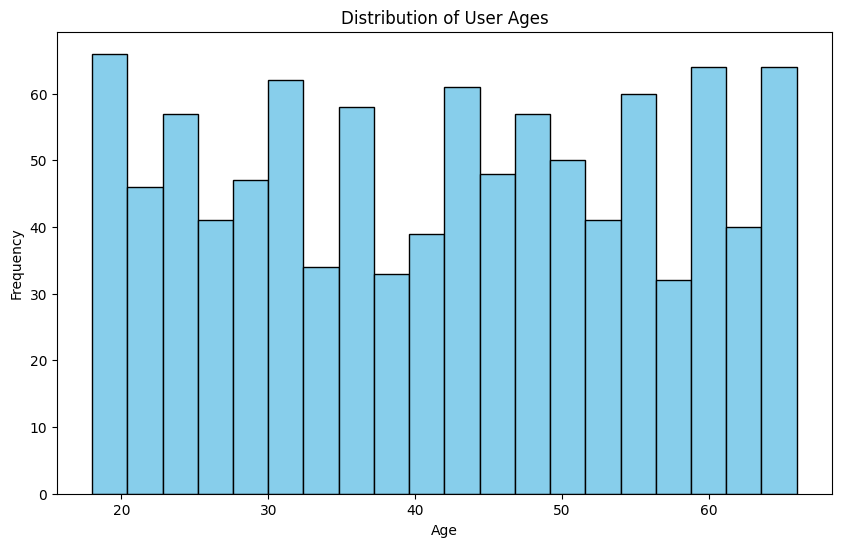

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(users_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

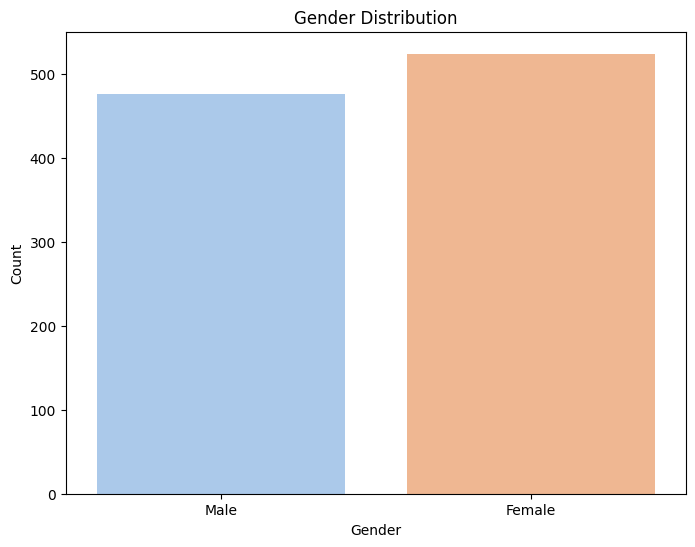

In [85]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=users_df, x='gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

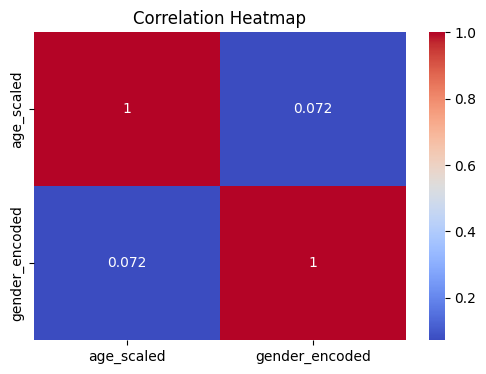

In [87]:
correlation_matrix = users_df[['age_scaled', 'gender_encoded']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
interactions_grouped = interactions_df.groupby(['user_id', 'product_id'])['weight'].sum().reset_index()

interactions_grouped = interactions_grouped.join(products_df.set_index('product_id'), on='product_id', how='inner')

interactions_grouped = interactions_grouped.join(users_df.set_index('user_id'), on='user_id', how='inner')

interactions_grouped['weight'] += 0.5 * (interactions_grouped['color'].isin(interactions_grouped['favorite_colors'])) + 0.5 * (interactions_grouped['category'].isin(interactions_grouped['favorite_categories'])) - 0.1 * interactions_grouped['price_scaled']

interactions_pivot = interactions_grouped.pivot(index='user_id', columns='product_id', values='weight').fillna(0)

extended_interaction_matrix = interactions_pivot.apply(lambda row: row / row.sum(), axis=1)
user_item_similarity = extended_interaction_matrix.div(extended_interaction_matrix.sum(axis=1), axis=0)

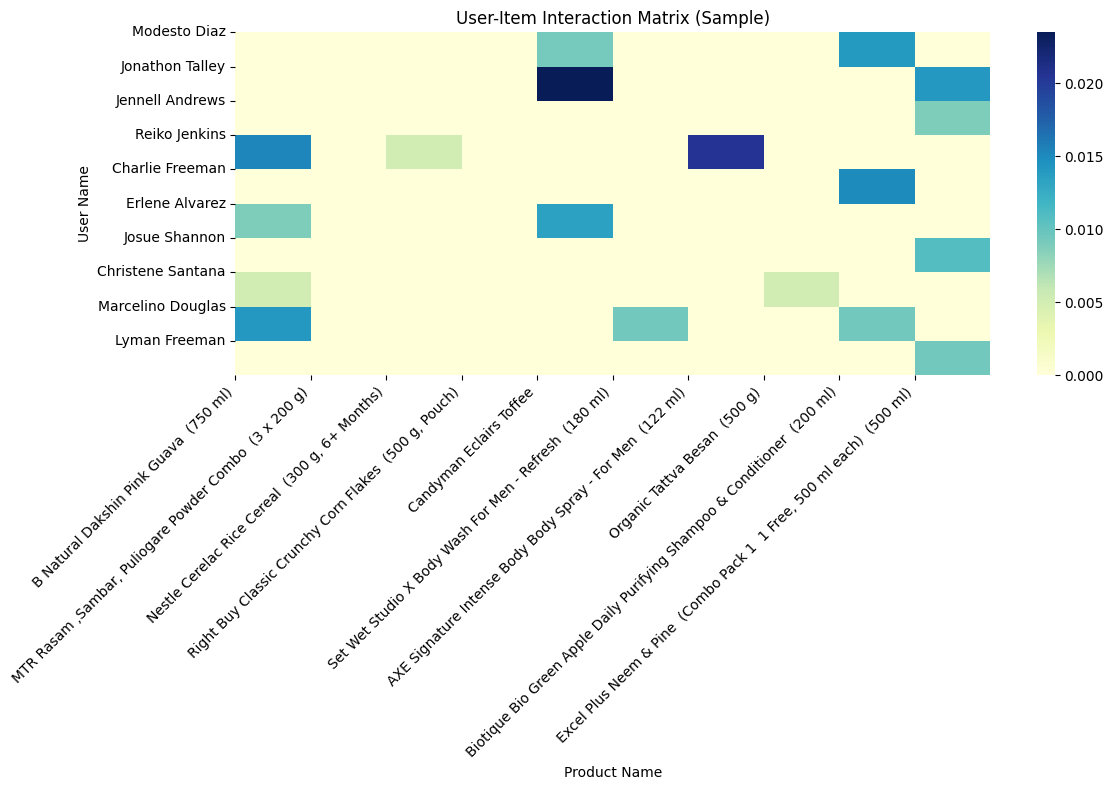

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a subset of users and products for demonstration
num_users_subset = 10
num_products_subset = 10
subset_interaction_matrix = extended_interaction_matrix.iloc[:num_users_subset, :num_products_subset]

# Get the corresponding user names and product names for the subset
subset_user_ids = subset_interaction_matrix.index
subset_product_ids = subset_interaction_matrix.columns
subset_user_names = users_df[users_df['user_id'].isin(subset_user_ids)]['user_name']
subset_product_names = products_df[products_df['product_id'].isin(subset_product_ids)]['product_name']

plt.figure(figsize=(12, 8))
sns.heatmap(subset_interaction_matrix, cmap='YlGnBu', cbar=True)
plt.title('User-Item Interaction Matrix (Sample)')
plt.xlabel('Product Name')
plt.ylabel('User Name')

# Set the x-axis and y-axis labels to the subset product names and user names
plt.xticks(ticks=range(num_products_subset), labels=subset_product_names, rotation=45, ha='right')
plt.yticks(ticks=range(num_users_subset), labels=subset_user_names, rotation=0)

plt.tight_layout()
plt.show()

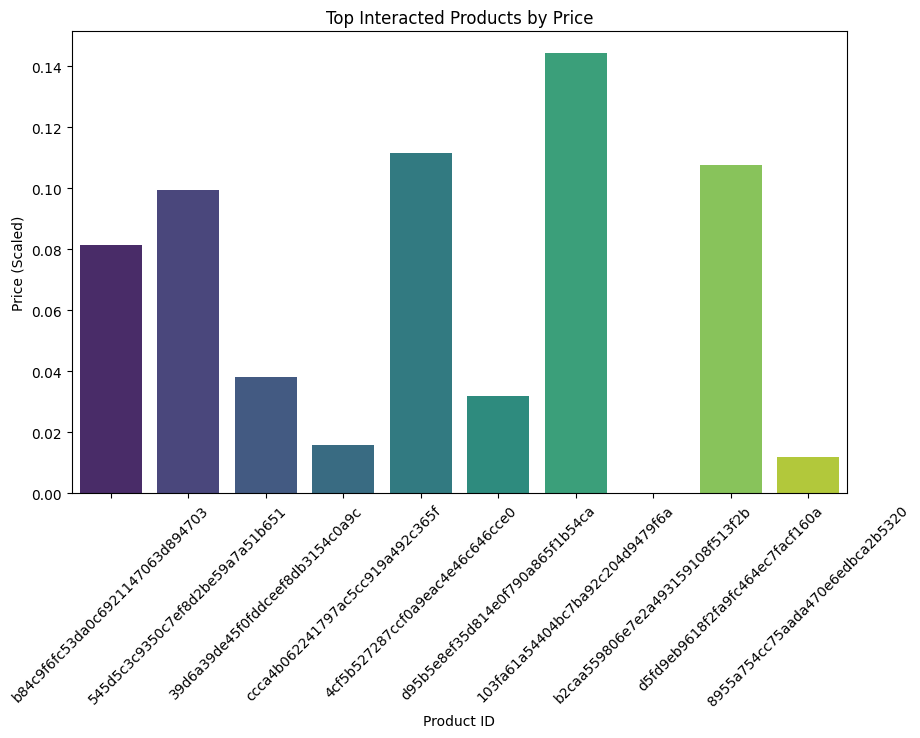

In [104]:
top_interacted_products = interactions_grouped.groupby('product_id')['weight'].sum().sort_values(ascending=False).head(10)
top_products_info = products_df[products_df['product_id'].isin(top_interacted_products.index)]

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products_info, x='product_id', y='price_scaled', palette='viridis')
plt.title('Top Interacted Products by Price')
plt.xlabel('Product ID')
plt.ylabel('Price (Scaled)')
plt.xticks(rotation=45)
plt.show()

In [74]:
def recommend_products(user_id, num_recommendations=5, threshold=2.5, item_popularity_factor=0.5):
  if user_id not in user_item_similarity.index:
    return products_df, products_df.to_markdown()

  user_similarity = user_item_similarity.loc[user_id]
  top_product_indices = np.argsort(user_similarity.values)[::-1]
  top_product_ids = user_similarity.index[top_product_indices]

  top_product_ids_df = top_product_ids.to_frame(name="product_id").reset_index(drop=True)  # Reset index here

  recommended_products_df = top_product_ids_df.merge(products_df, on='product_id')

  recommended_products_df['preference_score'] = user_similarity[top_product_indices].values
  popularity_scores = interactions_grouped[interactions_grouped['product_id'].isin(top_product_ids)].groupby('product_id')['weight'].sum()
  recommended_products_df['popularity_score'] = recommended_products_df['product_id'].map(popularity_scores)

  recommended_products_df['popularity_score'].fillna(0, inplace=True)

  recommended_products_df['recommendation_score'] = (1 - item_popularity_factor) * recommended_products_df['preference_score'] + item_popularity_factor * recommended_products_df['popularity_score']

  return (recommended_products_df, recommended_products_df.head().to_markdown(), recommended_products_df['product_name'])


In [99]:
import random

user_id = random.choice(users_df['user_id'])
recommended_products_list, recommended_products_df, recommended_products_name = recommend_products(user_id, item_popularity_factor=0.5)
print(
    f"Enhanced recommendations for user {users_df[users_df['user_id'] == user_id]['user_name'].values[0]}:\n\n {recommended_products_df}")

Enhanced recommendations for user Fredda Roth:

 |    | product_id                       | category              | product_name                                                 |   price | image                                                                                                                                                                 | color_hex   | color             |   price_scaled |   preference_score |   popularity_score |   recommendation_score |
|---:|:---------------------------------|:----------------------|:-------------------------------------------------------------|--------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------|:------------------|---------------:|-------------------:|-------------------:|-----------------------:|
|  0 | 62a9cd3ca71f5a752667844a2f3569e8 | Biscuits              | Parle G Original Gluco Biscuits  (2

In [76]:
def precision_recall_at_k(recommended_products, actual_interactions, k=5):
    # Calculate precision and recall
    num_relevant = len(set(actual_interactions).intersection(set(recommended_products_name[:k])))
    precision = num_relevant / k
    recall = num_relevant / len(actual_interactions)
    return precision, recall

In [77]:
def mean_reciprocal_rank(recommended_products, actual_interactions):
    # Calculate MRR
    for i, product_id in enumerate(recommended_products_name):
        if product_id in actual_interactions:
            return 1.0 / (i + 1)
    return 0.0

In [81]:
actual_interactions = interactions_df[interactions_df['user_id'] == user_id]['product_id'].tolist()
actual_names=products_df[products_df['product_id'].isin(actual_interactions)]['product_name'].tolist()

In [82]:
precision, recall = precision_recall_at_k(recommended_products_list, actual_names, k=10)
print(f"Precision at 10: {precision}, Recall at 10: {recall}")

Precision at 10: 1.0, Recall at 10: 0.09900990099009901


In [83]:
mrr = mean_reciprocal_rank(recommended_products_list, actual_names)
print(f"Mean Reciprocal Rank (MRR) for user {users_df[users_df['user_id'] == user_id]['user_name'].values[0]}: {mrr}")

Mean Reciprocal Rank (MRR) for user Stephan Andrews: 1.0


In [92]:
def evaluate_model(users_df, interactions_grouped, recommended_products_name, item_popularity_factor=0.5, k=5):
    precision_scores = []
    recall_scores = []
    mrr_scores = []

    for user_id in users_df['user_id']:
        actual_interactions = interactions_grouped[interactions_grouped['user_id'] == user_id]['product_id'].tolist()

        recommended_products_list, _, recommended_products_name = recommend_products(user_id, item_popularity_factor=item_popularity_factor)
        recommended_products = recommended_products_name[:k]

        precision, recall = precision_recall_at_k(recommended_products, actual_interactions, k)
        mrr = mean_reciprocal_rank(recommended_products, actual_interactions)

        precision_scores.append(precision)
        recall_scores.append(recall)
        mrr_scores.append(mrr)

    return precision_scores, recall_scores, mrr_scores

def plot_evaluation_results(precision_scores, recall_scores, mrr_scores):
    plt.figure(figsize=(12, 6))

    plt.subplot(131)
    sns.histplot(precision_scores, bins=20)
    plt.title('Precision Distribution')

    plt.subplot(132)
    sns.histplot(recall_scores, bins=20)
    plt.title('Recall Distribution')

    plt.subplot(133)
    sns.histplot(mrr_scores, bins=20)
    plt.title('MRR Distribution')

    plt.tight_layout()
    plt.show()

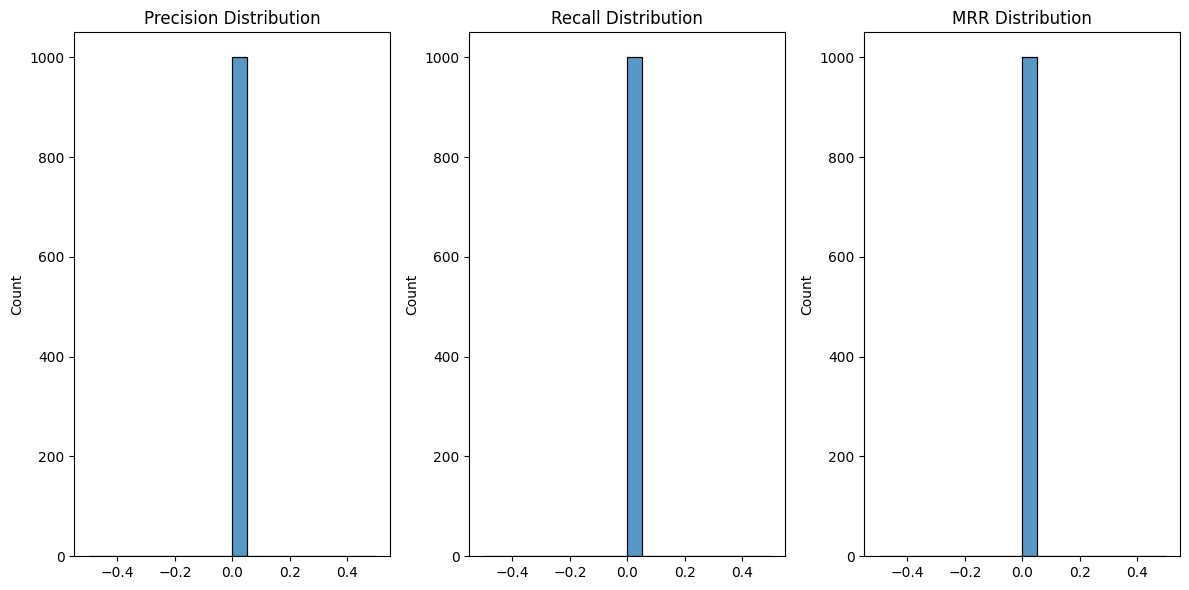

In [93]:
precision_scores, recall_scores, mrr_scores = evaluate_model(users_df, interactions_grouped, recommended_products_name)
plot_evaluation_results(precision_scores, recall_scores, mrr_scores)